# Forecast with ARIMA

## Introduction

In this notebook, I forecast using ARIMA-type approaches with the auto_arima package.

I put my comments at the end of the notebook.

## Set up

In [1]:
# Eliminate some warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Import key libraries and set some defaults

import numpy as np
import pandas as pd
from pandas.plotting import lag_plot

import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.gridspec as gridspec

# Need converters for matplotlib to use dates in time plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.gofplots import qqplot

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Set some Seaborn defaults
sns.set_style('whitegrid')
sns.set_context('paper')
sns.set_palette('muted')

In [4]:
# Add pmdarima auto_arima
from pmdarima.arima import auto_arima

# Note:  It doesn't import directly via Anaconda.  Need to $ pip install pmdarima.  
# Note:  This updated all sorts of other packages.  Need to use enviroments next time.

In [5]:
import my_func

## Load data

In [6]:
# Load already-split datasets
test_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_test_sj.pickle')
train_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_train_sj.pickle')
test_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_test_iq.pickle')
train_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_train_iq.pickle')

# Load already split, log-transformed datasets
log_train_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_train_sj.pickle')
log_test_sj = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_test_sj.pickle')
log_train_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_train_iq.pickle')
log_test_iq = pd.read_pickle('../sb_cap2_nb-99_data/prep_log_test_iq.pickle')


# Load scores
score_df = pd.read_pickle('../sb_cap2_nb-99_data/scores_after_nbk_5.pickle')

## Define functions

In [7]:
def graph_actual_and_forecast_from_test(df_original, city):
    
    # Clean up data frame
    df = df_original.copy()
    df.reset_index(inplace=True) # Reset the index for Seaborn
    
    # Create plot
    g = plt.figure(figsize=(9, 3), dpi=100)
    g = sns.lineplot(data=df, x='week_start_date', y='actual', label='actual')
    g = sns.lineplot(data=df, x='week_start_date', y='forecast', label='forecast')
    g = plt.xlabel('Date')
    g = plt.ylabel('Cases per week')
    g = plt.title('Actual and forecast values of test set for {}'.format(city))
    g = plt.legend(loc=1, prop={'size': 8})
    g = plt.box(on=None)

## Model with auto_arima - San Juan

In [8]:
# Instantiate the model and grid search - San Juan
aa_basic_sj = auto_arima(train_sj, m=52,
                          trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,52) [intercept=True]; AIC=5722.519, BIC=5758.939, Time=22.700 seconds
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=True]; AIC=5745.129, BIC=5754.234, Time=0.016 seconds
Fit ARIMA(1,1,0)x(1,0,0,52) [intercept=True]; AIC=5724.668, BIC=5742.878, Time=3.839 seconds
Fit ARIMA(0,1,1)x(0,0,1,52) [intercept=True]; AIC=5728.262, BIC=5746.472, Time=3.632 seconds
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=False]; AIC=5743.137, BIC=5747.690, Time=0.012 seconds
Fit ARIMA(2,1,2)x(0,0,1,52) [intercept=True]; AIC=5722.229, BIC=5754.096, Time=13.286 seconds
Fit ARIMA(2,1,2)x(0,0,0,52) [intercept=True]; AIC=5720.561, BIC=5747.876, Time=0.383 seconds
Fit ARIMA(2,1,2)x(1,0,0,52) [intercept=True]; AIC=5722.190, BIC=5754.057, Time=14.193 seconds
Fit ARIMA(1,1,2)x(0,0,0,52) [intercept=True]; AIC=5720.103, BIC=5742.866, Time=0.359 seconds
Fit ARIMA(1,1,2)x(1,0,0,52) [intercept=True]; AIC=5721.733, BIC=5749.048, Time=13.169 seconds
Fit ARIMA(1,1,2)x(0,0,

In [9]:
# Summarize the selected model - San Juan
aa_basic_sj.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  702
Model:               SARIMAX(3, 1, 2)   Log Likelihood               -2846.799
Date:                Sun, 14 Jun 2020   AIC                           5707.598
Time:                        07:01:46   BIC                           5739.465
Sample:                             0   HQIC                          5719.916
                                - 702                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0022      0.010     -0.221      0.825      -0.022       0.017
ar.L1          0.3684      0.068      5.407      0.000       0.235       0.502
ar.L2          0.7946      0.073     10.901      0.000       0.652       0.938
ar.L3         -0.2302      0.015    -15.555      0.000      -0.259      -0.201
ma.L1         -0.1993      0.072     -2.780      0.005      -0.340      -0.059
ma.L2         -0.7950      0.078    -10.212      0.000      -0.948      -0.642
sigma2       196.8208      5.527     35.612      0.000     185.988     207.653
===================================================================================
Ljung-Box (Q):                       57.71   Jarque-Bera (JB):              2669.63
Prob(Q):                              0.03   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             0.23
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
# Fit the model - San Juan
aa_basic_sj.fit(train_sj)

ARIMA(order=(3, 1, 2), seasonal_order=(0, 0, 0, 52), suppress_warnings=True)

In [11]:
# Forecast - San Juan
forc_periods  = len(test_sj)
aa_basic_sj_forc_array = aa_basic_sj.predict(n_periods=forc_periods)

In [12]:
# Create dataframe with actual and forecast - San Juan
aa_basic_sj_forc_df = test_sj.copy()
aa_basic_sj_forc_df['forecast'] = pd.to_numeric(aa_basic_sj_forc_array)
aa_basic_sj_forc_df.columns = ['actual', 'forecast']

# # test
# aa_basic_sj_forc_df.head(50)

In [14]:
# Score - San Juan
my_func.score('ARIMA', 1, 'SARIMAX (3, 1, 2) x (0, 0, 0, 52)', 'san juan', 'test', 'none', 
              aa_basic_sj_forc_df['actual'], aa_basic_sj_forc_df['forecast'], score_df) 

In [15]:
# Review score 
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
12,ARIMA,1,"SARMIA (3, 1, 2) x (0, 0, 0, 52)",san juan,test,none,29.482909,18.707521


In [ ]:
graph_actual_and_forecast_from_test(aa_basic_sj_forc_df, 'San Juan')

## Model with auto_arima - log(x+1) data - San Juan

In [16]:
# Instantiate the model and grid search
aa_basic_sj_log = auto_arima(log_train_sj, m=52, 
                             trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(1,0,1,52) [intercept=True]; AIC=565.436, BIC=601.856, Time=19.494 seconds
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=True]; AIC=690.533, BIC=699.638, Time=0.052 seconds
Fit ARIMA(1,1,0)x(1,0,0,52) [intercept=True]; AIC=628.519, BIC=646.729, Time=3.908 seconds
Fit ARIMA(0,1,1)x(0,0,1,52) [intercept=True]; AIC=606.087, BIC=624.297, Time=3.510 seconds
Fit ARIMA(0,1,0)x(0,0,0,52) [intercept=False]; AIC=688.573, BIC=693.125, Time=0.022 seconds
Fit ARIMA(2,1,2)x(0,0,1,52) [intercept=True]; AIC=574.953, BIC=606.821, Time=23.101 seconds
Fit ARIMA(2,1,2)x(1,0,0,52) [intercept=True]; AIC=574.853, BIC=606.721, Time=23.210 seconds
Fit ARIMA(2,1,2)x(2,0,1,52) [intercept=True]; AIC=546.786, BIC=587.758, Time=136.026 seconds
Near non-invertible roots for order (2, 1, 2)(2, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(2,1,2)x(1,0,2,52) [intercept=True]; AIC=549.549, BIC=5

In [17]:
# Summarize the selected model
aa_basic_sj_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  702
Model:             SARIMAX(2, 1, 2)x(2, 0, [1], 52)   Log Likelihood                -264.393
Date:                              Sun, 14 Jun 2020   AIC                            546.786
Time:                                      07:20:03   BIC                            587.758
Sample:                                           0   HQIC                           562.623
                                              - 702                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -8.575e-07   6.85e-05     -0.013      0.990      -0.000       0.000
ar.L1          1.1415      0.072     15.847      0.000       1.000       1.283
ar.L2         -0.3416      0.059     -5.752      0.000      -0.458      -0.225
ma.L1         -1.5833      0.058    -27.460      0.000      -1.696      -1.470
ma.L2          0.7352      0.046     15.822      0.000       0.644       0.826
ar.S.L52       0.8857      0.076     11.697      0.000       0.737       1.034
ar.S.L104      0.0953      0.045      2.129      0.033       0.008       0.183
ma.S.L52      -0.9176      0.105     -8.720      0.000      -1.124      -0.711
sigma2         0.1195      0.007     16.988      0.000       0.106       0.133
===================================================================================
Ljung-Box (Q):                       57.35   Jarque-Bera (JB):                55.21
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               2.07   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
# Fit the model
aa_basic_sj_log.fit(log_train_sj)

ARIMA(order=(2, 1, 2), seasonal_order=(2, 0, 1, 52), suppress_warnings=True)

In [19]:
# Forecast
forc_periods  = len(log_test_sj)
aa_basic_sj_log_forc_array_log = aa_basic_sj_log.predict(n_periods=forc_periods)

In [20]:
# Tranform back the log data
aa_basic_sj_log_forc_array = np.expm1(aa_basic_sj_log_forc_array_log)

In [21]:
# Create dataframe with actual and forecast
aa_basic_sj_log_forc_df = test_sj.copy()
aa_basic_sj_log_forc_df['forecast'] = pd.to_numeric(aa_basic_sj_log_forc_array)
aa_basic_sj_log_forc_df.columns = ['actual', 'forecast']

In [22]:
# Score
my_func.score('ARIMA', 2, 'SARIMAX (2, 1, 2) x (2, 0, 1, 52)', 'san juan', 'test', 'log(x+1)', 
              aa_basic_sj_log_forc_df['actual'], aa_basic_sj_log_forc_df['forecast'], score_df) 

In [23]:
# Review score 
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
13,ARIMA,2,"SARIMAX (2, 1, 2) x (2, 0, 1, 52)",san juan,test,log(x+1),26.606072,15.849436


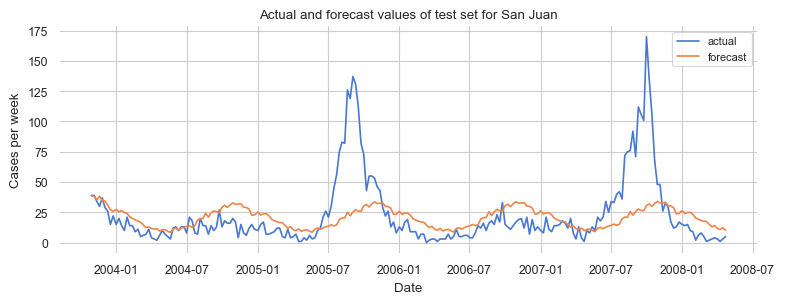

In [24]:
graph_actual_and_forecast_from_test(aa_basic_sj_log_forc_df, 'San Juan')

## Model with auto_arima - Iquitos

In [25]:
# Instantiate the model and grid search
aa_basic_iq = auto_arima(train_iq, m=52, 
                         trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,0,1,52) [intercept=True]; AIC=2319.659, BIC=2350.076, Time=13.577 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=True]; AIC=2539.381, BIC=2546.985, Time=0.014 seconds
Fit ARIMA(1,0,0)x(1,0,0,52) [intercept=True]; AIC=2336.655, BIC=2351.863, Time=2.471 seconds
Fit ARIMA(0,0,1)x(0,0,1,52) [intercept=True]; AIC=2387.287, BIC=2402.496, Time=1.938 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=False]; AIC=2698.498, BIC=2702.300, Time=0.006 seconds
Fit ARIMA(2,0,2)x(0,0,1,52) [intercept=True]; AIC=2324.454, BIC=2351.068, Time=5.983 seconds
Fit ARIMA(2,0,2)x(1,0,0,52) [intercept=True]; AIC=2324.183, BIC=2350.798, Time=6.308 seconds
Fit ARIMA(2,0,2)x(2,0,1,52) [intercept=True]; AIC=2319.319, BIC=2353.538, Time=41.356 seconds
Fit ARIMA(2,0,2)x(2,0,0,52) [intercept=True]; AIC=2318.322, BIC=2348.739, Time=26.697 seconds
Fit ARIMA(1,0,2)x(2,0,0,52) [intercept=True]; AIC=2317.390, BIC=2344.005, Time=17.667 seconds
Fit ARIMA(1,0,2)x(1,0,

In [26]:
# Summarize the selected model
aa_basic_iq.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  331
Model:             SARIMAX(1, 0, 4)x(2, 0, [], 52)   Log Likelihood               -1147.698
Date:                             Sun, 14 Jun 2020   AIC                           2313.397
Time:                                     07:33:21   BIC                           2347.616
Sample:                                          0   HQIC                          2327.045
                                             - 331                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.7842      1.174      1.520      0.129      -0.517       4.085
ar.L1          0.7450      0.105      7.098      0.000       0.539       0.951
ma.L1         -0.0926      0.107     -0.867      0.386      -0.302       0.117
ma.L2         -0.1801      0.084     -2.141      0.032      -0.345      -0.015
ma.L3          0.0850      0.051      1.665      0.096      -0.015       0.185
ma.L4          0.1621      0.064      2.538      0.011       0.037       0.287
ar.S.L52       0.0466      0.102      0.459      0.646      -0.152       0.246
ar.S.L104      0.1481      0.043      3.466      0.001       0.064       0.232
sigma2        59.5570      2.227     26.747      0.000      55.193      63.921
===================================================================================
Ljung-Box (Q):                       12.17   Jarque-Bera (JB):              5989.81
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.30   Skew:                             2.46
Prob(H) (two-sided):                  0.17   Kurtosis:                        23.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
# Fit the model
aa_basic_iq.fit(train_iq)

ARIMA(order=(1, 0, 4), seasonal_order=(2, 0, 0, 52), suppress_warnings=True)

In [28]:
# Forecast 
forc_periods  = len(test_iq)
aa_basic_iq_forc_array = aa_basic_iq.predict(n_periods=forc_periods)

In [29]:
# Create dataframe with actual and forecast - Iquitos
aa_basic_iq_forc_df = test_iq.copy()
aa_basic_iq_forc_df['forecast'] = pd.to_numeric(aa_basic_iq_forc_array)
aa_basic_iq_forc_df.columns = ['actual', 'forecast']

In [30]:
# Score
my_func.score('ARIMA', 3, 'SARIMAX (1, 0, 4) x (2, 0, 0, 52)', 'iquitos', 'test', 'none', 
              aa_basic_iq_forc_df['actual'], aa_basic_iq_forc_df['forecast'], score_df) 

In [31]:
# Review score 
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
14,ARIMA,3,"SARMIAX (1, 0, 4) x (2, 0, 0, 52)",iquitos,test,none,11.023207,7.021882


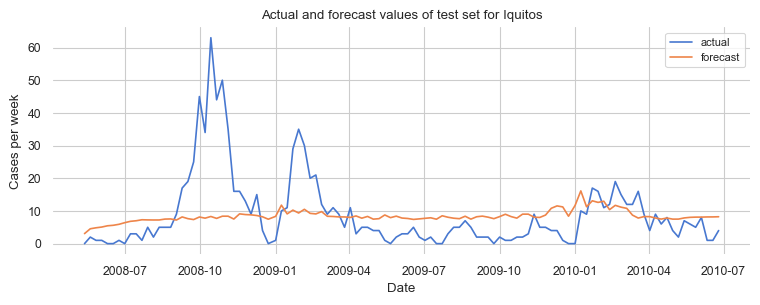

In [32]:
graph_actual_and_forecast_from_test(aa_basic_iq_forc_df, 'Iquitos')

In [33]:
aa_basic_iq_forc_df['forecast'].describe()

count    111.000000
mean       8.392399
std        1.763245
min        3.068160
25%        7.598354
50%        8.162489
75%        8.755584
max       16.134277
Name: forecast, dtype: float64

## Model with auto_arima - log(x+1) data - Iquitos

In [34]:
# Instantiate the model and grid search
aa_basic_iq_log = auto_arima(log_train_iq, m=52,
                             trace=True, error_action='ignore', suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,0,1,52) [intercept=True]; AIC=593.591, BIC=624.008, Time=13.375 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=True]; AIC=872.213, BIC=879.817, Time=0.037 seconds
Fit ARIMA(1,0,0)x(1,0,0,52) [intercept=True]; AIC=631.926, BIC=647.134, Time=3.387 seconds
Fit ARIMA(0,0,1)x(0,0,1,52) [intercept=True]; AIC=748.546, BIC=763.754, Time=1.351 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=False]; AIC=1427.555, BIC=1431.357, Time=0.006 seconds
Fit ARIMA(2,0,2)x(0,0,1,52) [intercept=True]; AIC=593.846, BIC=620.461, Time=8.466 seconds
Fit ARIMA(2,0,2)x(1,0,0,52) [intercept=True]; AIC=593.594, BIC=620.209, Time=11.070 seconds
Fit ARIMA(2,0,2)x(2,0,1,52) [intercept=True]; AIC=595.649, BIC=629.868, Time=55.620 seconds
Near non-invertible roots for order (2, 0, 2)(2, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.995)
Fit ARIMA(2,0,2)x(1,0,2,52) [intercept=True]; AIC=593.851, BIC=6

In [35]:
# Summarize the selected model
aa_basic_iq_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:               SARIMAX(1, 0, 1)   Log Likelihood                -291.388
Date:                Sun, 14 Jun 2020   AIC                            590.776
Time:                        07:40:07   BIC                            605.985
Sample:                             0   HQIC                           596.842
                                - 331                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1556      0.055      2.807      0.005       0.047       0.264
ar.L1          0.9161      0.027     33.441      0.000       0.862       0.970
ma.L1         -0.4466      0.062     -7.165      0.000      -0.569      -0.324
sigma2         0.3395      0.025     13.444      0.000       0.290       0.389
===================================================================================
Ljung-Box (Q):                       32.35   Jarque-Bera (JB):                 1.62
Prob(Q):                              0.80   Prob(JB):                         0.45
Heteroskedasticity (H):               1.34   Skew:                            -0.12
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
# Fit the model
aa_basic_iq_log.fit(log_train_iq)

ARIMA(order=(1, 0, 1), seasonal_order=(0, 0, 0, 52), suppress_warnings=True)

In [37]:
# Forecast
forc_periods  = len(log_test_iq)
aa_basic_iq_log_forc_array_log = aa_basic_iq_log.predict(n_periods=forc_periods)

In [38]:
# Tranform back the log data
aa_basic_iq_log_forc_array = np.expm1(aa_basic_iq_log_forc_array_log)

In [45]:
# Create dataframe with actual and forecast - San Juan
aa_basic_iq_log_forc_df = test_iq.copy()
aa_basic_iq_log_forc_df['forecast'] = pd.to_numeric(aa_basic_iq_log_forc_array)
aa_basic_iq_log_forc_df.columns = ['actual', 'forecast']

In [46]:
# # Score
# my_func.score('arima_auto', 'SARIMAX(2, 1, 2)x(2, 0, 1, 52), log', 'iquitos', 'test', 
#       aa_basic_iq_log_forc_df['actual'], aa_basic_iq_log_forc_df['forecast'], score_df) 

In [56]:
# Score
my_func.score('ARIMA', 4, 'SARIMAX (1, 0, 1) x (0, 0, 0, 52)', 'iquitos', 'test', 'log(x+1)', 
              aa_basic_iq_log_forc_df['actual'], aa_basic_iq_log_forc_df['forecast'], score_df) 

In [57]:
# Review score 
score_df.tail(1)

,approach,variation,summary,city,data,transform,rmse,mae
15,ARIMA,4,"SARMIAX (1, 0, 1) x (0, 0, 0, 52)",iquitos,test,log(x+1),11.954236,6.764148


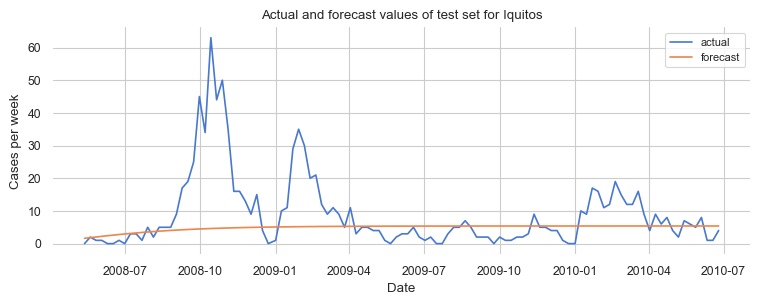

In [58]:
graph_actual_and_forecast_from_test(aa_basic_iq_log_forc_df, 'Iquitos')

## Summarize scores

In [59]:
score_df.sort_values(by=['data', 'mae'], ascending=True).sort_values(by=['city'], ascending=False)

,approach,variation,summary,city,data,transform,rmse,mae
13,ARIMA,2,"SARIMAX (2, 1, 2) x (2, 0, 1, 52)",san juan,test,log(x+1),26.606072,15.849436
12,ARIMA,1,"SARMIA (3, 1, 2) x (0, 0, 0, 52)",san juan,test,none,29.482909,18.707521
4,naive,3,seasonal naive method,san juan,test,none,35.954565,21.337607
0,naive,1,average method,san juan,test,none,32.393166,28.027285
2,naive,2,naive method,san juan,test,none,32.873430,28.713675
3,naive,2,naive method,san juan,train,none,14.527214,8.495007
1,naive,1,average method,san juan,train,none,56.612447,33.000524
5,naive,3,seasonal naive method,san juan,train,none,81.504167,42.003077
15,ARIMA,4,"SARMIAX (1, 0, 1) x (0, 0, 0, 52)",iquitos,test,log(x+1),11.954236,6.764148
14,ARIMA,3,"SARMIAX (1, 0, 4) x (2, 0, 0, 52)",iquitos,test,none,11.023207,7.021882


## Save scores

In [60]:
score_df.to_pickle('../sb_cap2_nb-99_data/scores_after_nbk_6.pickle')

## Commentary

I start my time series forecasting with the Pyramid auto_arima module.  This module is based on the well-known R function, auto.arima.  The module fits both ARIMA-type and seasonal ARIMA (aka, SARIMA-type) models.  It works by conducting a grid-search across key ARIMA parameters and minimizing AIC.  These parameters are notated as MODEL_TYPE (p, d, q) x (P, D, Q, m) where:

* p and seasonal P represent the autoregressive terms (aka, the lags of the series once made stationary),
* d and seasonal D represent the differencing that must be done to make the series stationary,
* q and seasonal Q represent the number of moving average terms (aka, the lags of the forecast errors), and
* m represents the length of the season.

First, I model the San Juan training data:

* I provide one parameter--the fact that we're working with weekly data (aka, a seasonality of 52).  
* The selected model off non-transformed data is SARIMA(3,1,2)x(0,0,0,52).  What I find interesting is the lack of P, D and Q in the seasonal parameters.
* In looking of the graph of the actual and forecast data, I find the lack of variability in the forecast--the fact that it's a flat curve--is surprising.  
* The MAE and RMSE of the auto_arima model outperform the all of the earlier simple models.
* When I provide the model with log-tranformed data, a different model is selected:  SARIMAX(2, 1, 2)x(2, 0, 1, 52)
* And that model performs even better.

Next, I model the Iquitos data.

* I give the model the weekly seasonality (aka, m=52).
* The selected model of non-transformed data is SARIMAX(1, 0, 4)x(2, 0, 0, 52).  The key differences between the models are Iquitos has a 1-lag autoregressive term and a 2-lag seasonal autoregressive term.  There is no differencing done to make the data stationary.  There are 4-moving average terms.
* Graphically, the model has a bit more variability than the San Juan model.
* When provided log-transformed data, a different model is selected, and that model performs even better.